In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
import csv
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
print("cell 1 17/11")

cell 1 17/11


In [17]:
consumer_key="eqIQASCB8Y3FMj5Z1C5ikKzfc"
consumer_scret="aeEtnufunsCIwrqm7wNU9AEIyqF94FS6GY1c4z0zTs8qchjjqt"
access_token="1377948754658009093-BMOABJw3AlCOLAtd3x1ouIZiGJ4HNZ"
access_token_scret="I628eefbnpWzUDwvg9uV7ZtkDqzFcLUnOvYi56nEDbViE"
print("cell2222  17/11")

cell2222  17/11


In [18]:
auth=tw.OAuthHandler(consumer_key,consumer_scret)
auth.set_access_token(access_token,access_token_scret)
api=tw.API(auth,wait_on_rate_limit=True)
print("cell333  17/11")

cell333  17/11


In [20]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
print("cell 4 17/11")

cell 4 17/11


In [ ]:
import csv

search_term = "#vaccine" + "-filter:retweets"
csvFile=open(r'C:\Users\DELL\Desktop\mask covid19\mask dataset\file1711.csv','w')


with csvFile:
    csvWriter=csv.writer(csvFile)
    for tweet in  tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-07-01').items():
      csvWriter.writerow([tweet.created_at,tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'),tweet.user.location.encode('utf-8')])

print("file  updated")

In [22]:
dir(api)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_list_members',
 '_lookup_friendships',
 '_pack_image',
 '_remove_list_members',
 '_send_direct_message',
 'add_list_member',
 'add_list_members',
 'api_root',
 'auth',
 'blocks',
 'blocks_ids',
 'cache',
 'cached_result',
 'compression',
 'configuration',
 'create_block',
 'create_favorite',
 'create_friendship',
 'create_list',
 'create_media_metadata',
 'create_mute',
 'create_saved_search',
 'destroy_block',
 'destroy_direct_message',
 'destroy_favorite',
 'destroy_friendship',
 'destroy_list',
 'destroy_mute',
 'destroy_saved_search',
 'destroy_status',
 'favorites',
 'followers',
 'followers_ids',
 'friends',
 

In [31]:
tweets = tw.Cursor(api.search,
                   q=search_term,count=1000,
                   lang="en",
                   since='2020-07-01').items()


In [30]:
user = [[tweet.user.location,tweet.user.screen_name] for tweet in tweets]
print(type(user))
user_text=pd.DataFrame(data=user,columns=['location', 'screen_name'])
user_text
type(user_text)

<class 'list'>


pandas.core.frame.DataFrame

In [105]:
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]
tweets_no_urls[:10]

['Encouraging you to wear a mask and get vaccinated isnt about pushing an agenda We actually care about you We don',
 'Helmet saves you in the field And mask Saves you no matter where you arecricekt cricketlovers',
 'DrLeanaWen your insights on covid19 with regards to new variants mask mandates boosters etc are so thoughtpro',
 'Raging Karen attacks restaurant workers with cleaning spray and fists I dont need a mask Im vaccinated',
 'Wear a mask get jab help stop Covid19 Simples You know it makes senseCOVID19 WearAMask',
 'Register to vote on 18 19 September 8am 5pm Or register online now at If you',
 'ChristinaPushaw PressSec FL Covid is under control here Mask amp vax mandates dont work We got this Also F',
 'A question you can ask a COVID19 denier and Ill bet theyll be too cowardly to answerHow come laws mandating',
 'Look if you say you have the right to not get vaccinated not wear a mask and infect people then I have the right',
 'They want you to lockdown and mask up but they won

In [25]:
all_tweets = [tweet.lower() for tweet in tweets_no_urls]

all_tweets[:10]

NameError: name 'tweets_no_urls' is not defined

In [107]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets]

sentiment_objects[1].polarity, sentiment_objects[3]

(0.0,
 TextBlob("raging karen attacks restaurant workers with cleaning spray and fists i dont need a mask im vaccinated"))

In [35]:
# Create dataframe containing the polarity value and tweet text

sentiment_df = pd.DataFrame(sentiment_values, columns=["sentiment","polarity", "tweet"])

sentiment_df.head(10)

NameError: name 'sentiment_values' is not defined

NameError: name 'sentiment_df' is not defined

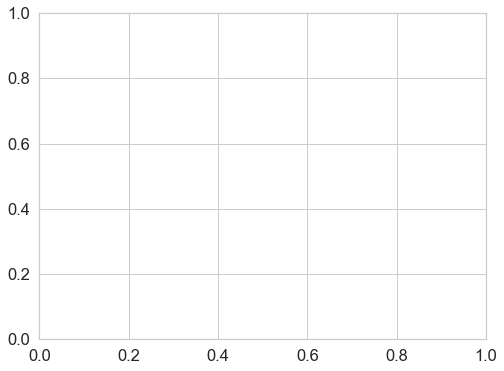

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on COVID19")
plt.show()

In [34]:
sentiment_df.to_csv(r'C:\Users\DELL\Desktop\mask covid19\finaldataset mask.csv',encoding='utf-8',index=False)

NameError: name 'sentiment_df' is not defined

In [34]:
import csv
pp= "C:\\Users\\DELL\\Desktop\\mask covid19\\finaldataset mask.csv"
names = ['sentiment', 'polarity', 'tweet']
dataset = pd.read_csv(pp, names=names)
print("data read")

data read


In [35]:
dataset[:10]

,sentiment,polarity,tweet
0,positive,0.500000,cdc studies across 13 states show unvaccinated...
1,neutral,0.000000,masks dont work they are only for showmask mas...
2,positive,0.050000,no vaccine wearing a mask amp keeping 6feet di...
3,positive,0.175000,telegraph western media and governments are fu...
4,positive,0.300000,lt family friend died of covid19 over the week...
5,positive,0.136364,south carolina city passes a new mask mandate ...
6,negative,-0.500000,the war against corona is over its time to acc...
7,positive,0.333333,smc429 in minnesota youre lucky if 15 of the p...
8,neutral,0.000000,some of allyuh wasting allyuh money buying all...
9,neutral,0.000000,whats the point of the vaccine if you still ha...


In [36]:
print(dataset.describe())

          polarity
count  4560.000000
mean      0.059323
std       0.246686
min      -1.000000
25%       0.000000
50%       0.000000
75%       0.142857
max       1.000000


In [37]:
print(dataset.groupby('sentiment').size())

sentiment
negative     770
neutral     2136
positive    1654
dtype: int64


In [38]:
print(dataset.groupby('polarity').size())

polarity
-1.000000    11
-0.975000     1
-0.928571     1
-0.900000     1
-0.857143     1
             ..
 0.766667     1
 0.800000    32
 0.850000     1
 0.900000     1
 1.000000    25
Length: 412, dtype: int64


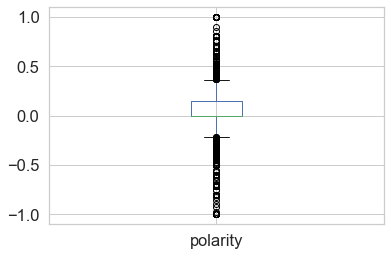

In [43]:
import matplotlib.pyplot as plt
dataset.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

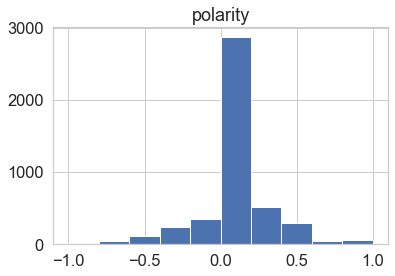

In [44]:
dataset.hist()
plt.show()

In [46]:
print(dataset.shape)

(4560, 3)


In [47]:
print(dataset['sentiment'].unique())

['positive' 'neutral' 'negative']


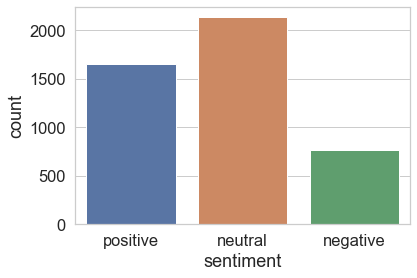

In [48]:
import seaborn as sns
sns.countplot(dataset['sentiment'],label="Count")
plt.show()

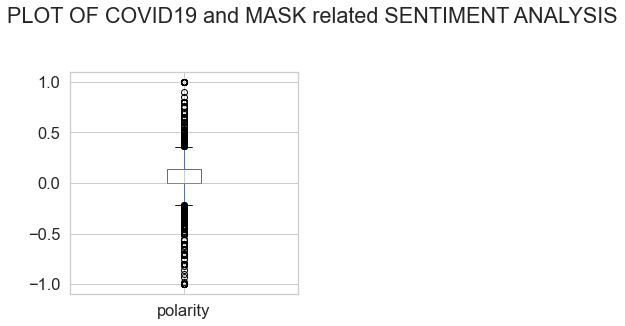

In [50]:
dataset.drop('sentiment',axis=1).plot(kind='box',subplots=True,layout=(2,2),
                                      sharex=False,sharey=False,figsize=(9,9),
                                      title='PLOT OF COVID19 and MASK related SENTIMENT ANALYSIS')
plt.savefig('Sentiment analysis')
plt.show()
          

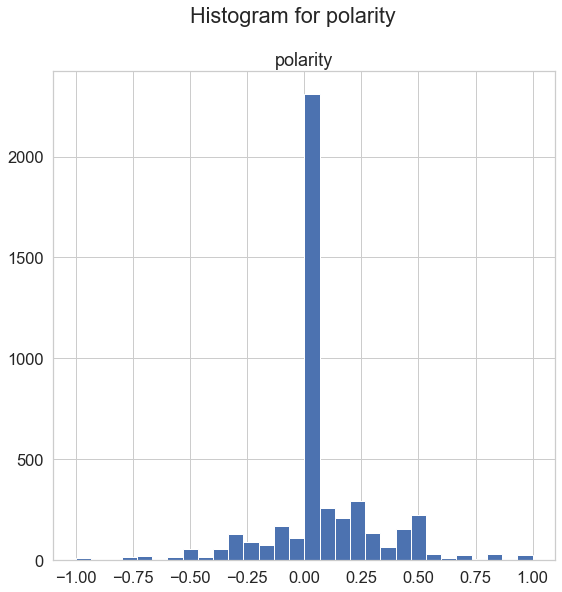

In [51]:
import pylab as pl
dataset.drop('sentiment' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for polarity ")
plt.savefig('sentiment_hist')
plt.show()

In [36]:
import csv
pp= (r"C:\\Users\\DELL\\Desktop\\mask covid19\\finaldataset mask no text.csv")
#names = [ 'polarity','sentiment']
dataset123 = pd.read_csv(pp)
print("data read")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\\\Users\\\\DELL\\\\Desktop\\\\mask covid19\\\\finaldataset mask no text.csv'

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.svm import SVC
array = dataset123.values
X = array[:,0:4]
y = array[:,2]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train,Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: nan (nan)
LDA: nan (nan)
KNN: nan (nan)
CART: nan (nan)
NB: nan (nan)
SVM: nan (nan)
